In [533]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [534]:
def calc_mse(y, y_pred): #расчет mse
    err = np.mean((y - y_pred)**2)
    return err

__Задача:__ предсказание баллов ЕГЭ ученика

In [535]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [536]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нумерация задач в домашнем задании может не совпадать с указанной в задании на сайте, так как в задании и методичке к уроку задания пронумерованы по-разному. Задания будут пронумерованы по мере их выполнения.

## 1. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Проведем сначала нормализацию, а потом стандартизацию:

Нормализация:

In [537]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [538]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [539]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])

In [540]:
print('Исходные данные после нормализации в формате float\n', np.around(X_norm, 2))
for i in range(1, X_norm.shape[1]):
    print(f'Столбец {i}: mean: {round(X_norm[:,i].mean(), 2)}, std: {round(X_norm[:,i].std(),2)}, min: {round(X_norm[:,i].min(),2)}, max: {round(X_norm[:,i].max(),2)}')

Исходные данные после нормализации в формате float
 [[1.   0.1  0.03 0.  ]
 [1.   0.1  0.16 0.  ]
 [1.   0.2  0.19 0.5 ]
 [1.   0.5  0.1  0.  ]
 [1.   0.3  0.65 0.5 ]
 [1.   0.   0.23 0.  ]
 [1.   0.5  0.68 1.  ]
 [1.   1.   1.   1.  ]
 [1.   0.1  0.   0.  ]
 [1.   0.2  0.35 0.5 ]]
Столбец 1: mean: 0.3, std: 0.28, min: 0.0, max: 1.0
Столбец 2: mean: 0.34, std: 0.31, min: 0.0, max: 1.0
Столбец 3: mean: 0.35, std: 0.39, min: 0.0, max: 1.0


Стандартизация на нормализованных данных:

In [541]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [542]:
X_norm.shape

(10, 4)

In [543]:
X_st = X_norm.copy().astype(np.float64)
print('Нормализованные данные\n', np.around(X_st,2))
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])
print('После стандартизации\n',np.around(X_st, 2))
for i in range(1, X_st.shape[1]):
    print(f'Столбец {i}: mean: {round(X_st[:,i].mean(), 2)}, std: {round(X_st[:,i].std(),2)}, min: {round(X_st[:,i].min(),2)}, max: {round(X_st[:,i].max(),2)}')

Нормализованные данные
 [[1.   0.1  0.03 0.  ]
 [1.   0.1  0.16 0.  ]
 [1.   0.2  0.19 0.5 ]
 [1.   0.5  0.1  0.  ]
 [1.   0.3  0.65 0.5 ]
 [1.   0.   0.23 0.  ]
 [1.   0.5  0.68 1.  ]
 [1.   1.   1.   1.  ]
 [1.   0.1  0.   0.  ]
 [1.   0.2  0.35 0.5 ]]
После стандартизации
 [[ 1.   -0.71 -0.98 -0.9 ]
 [ 1.   -0.71 -0.57 -0.9 ]
 [ 1.   -0.35 -0.46  0.38]
 [ 1.    0.71 -0.77 -0.9 ]
 [ 1.   -0.    0.98  0.38]
 [ 1.   -1.06 -0.36 -0.9 ]
 [ 1.    0.71  1.08  1.66]
 [ 1.    2.47  2.11  1.66]
 [ 1.   -0.71 -1.08 -0.9 ]
 [ 1.   -0.35  0.05  0.38]]
Столбец 1: mean: -0.0, std: 1.0, min: -1.06, max: 2.47
Столбец 2: mean: -0.0, std: 1.0, min: -1.08, max: 2.11
Столбец 3: mean: 0.0, std: 1.0, min: -0.9, max: 1.66


Теперь попробуем провести стандартизацию на исходных данных

Стандартизация на исходных данных:

In [544]:
X_st = X.copy().astype(np.float64)
print('Ненормализованные исходные данные в формате float\n', np.around(X_st,2))
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])
print('После стандартизации\n',np.around(X_st,2))
for i in range(1, X_st.shape[1]):
    print(f'Столбец {i}: mean: {round(X_st[:,i].mean(), 2)}, std: {round(X_st[:,i].std(),2)}, min: {round(X_st[:,i].min(),2)}, max: {round(X_st[:,i].max(),2)}')

Ненормализованные исходные данные в формате float
 [[1.00e+00 1.00e+00 5.00e+02 1.00e+00]
 [1.00e+00 1.00e+00 7.00e+02 1.00e+00]
 [1.00e+00 2.00e+00 7.50e+02 2.00e+00]
 [1.00e+00 5.00e+00 6.00e+02 1.00e+00]
 [1.00e+00 3.00e+00 1.45e+03 2.00e+00]
 [1.00e+00 0.00e+00 8.00e+02 1.00e+00]
 [1.00e+00 5.00e+00 1.50e+03 3.00e+00]
 [1.00e+00 1.00e+01 2.00e+03 3.00e+00]
 [1.00e+00 1.00e+00 4.50e+02 1.00e+00]
 [1.00e+00 2.00e+00 1.00e+03 2.00e+00]]
После стандартизации
 [[ 1.   -0.71 -0.98 -0.9 ]
 [ 1.   -0.71 -0.57 -0.9 ]
 [ 1.   -0.35 -0.46  0.38]
 [ 1.    0.71 -0.77 -0.9 ]
 [ 1.    0.    0.98  0.38]
 [ 1.   -1.06 -0.36 -0.9 ]
 [ 1.    0.71  1.08  1.66]
 [ 1.    2.47  2.11  1.66]
 [ 1.   -0.71 -1.08 -0.9 ]
 [ 1.   -0.35  0.05  0.38]]
Столбец 1: mean: 0.0, std: 1.0, min: -1.06, max: 2.47
Столбец 2: mean: -0.0, std: 1.0, min: -1.08, max: 2.11
Столбец 3: mean: 0.0, std: 1.0, min: -0.9, max: 1.66


Вывод: проведение нормализации перед стандартизацией не имеет смысла. Итоговый результат стандартизации как исходных данных, так и нормализованных, один и тот же

Теперь попробуем провести на стандартизованных исходных данных нормализацию

In [545]:
X_norm = X_st.copy()
X_norm = X_norm.astype(np.float64)
print('Стандартизованные данные в формате float\n', np.around(X_norm,2))
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm
print('Данные после стандартизации и последующей нормализации в формате float\n', np.around(X_norm,2))
for i in range(1, X_norm.shape[1]):
    print(f'Столбец {i}: mean: {round(X_norm[:,i].mean(), 2)}, std: {round(X_norm[:,i].std(),2)}, min: {round(X_norm[:,i].min(),2)}, max: {round(X_norm[:,i].max(),2)}')

Стандартизованные данные в формате float
 [[ 1.   -0.71 -0.98 -0.9 ]
 [ 1.   -0.71 -0.57 -0.9 ]
 [ 1.   -0.35 -0.46  0.38]
 [ 1.    0.71 -0.77 -0.9 ]
 [ 1.    0.    0.98  0.38]
 [ 1.   -1.06 -0.36 -0.9 ]
 [ 1.    0.71  1.08  1.66]
 [ 1.    2.47  2.11  1.66]
 [ 1.   -0.71 -1.08 -0.9 ]
 [ 1.   -0.35  0.05  0.38]]
Данные после стандартизации и последующей нормализации в формате float
 [[1.   0.1  0.03 0.  ]
 [1.   0.1  0.16 0.  ]
 [1.   0.2  0.19 0.5 ]
 [1.   0.5  0.1  0.  ]
 [1.   0.3  0.65 0.5 ]
 [1.   0.   0.23 0.  ]
 [1.   0.5  0.68 1.  ]
 [1.   1.   1.   1.  ]
 [1.   0.1  0.   0.  ]
 [1.   0.2  0.35 0.5 ]]
Столбец 1: mean: 0.3, std: 0.28, min: 0.0, max: 1.0
Столбец 2: mean: 0.34, std: 0.31, min: 0.0, max: 1.0
Столбец 3: mean: 0.35, std: 0.39, min: 0.0, max: 1.0


Вывод: проведение стандартизации перед нормализацией не имеет смысла. Итоговый результат нормализации как исходных данных, так и стандартизированных, один и тот же

Ответ: применение к одному и тому же признаку и нормализации, и стандартизации одновременно невозможно в силу того, что это разные преобразования (нормализация задает диапазон разброса данных 0-1 с сохранением соотношений между данными, стандартизация задает среднее значение 0 и среднеквадратичное отклонение 1 с сохранением соотношений между данными). Применение их последовательно не имеет смысла, так как приводит к такому же результату, что и применение последней операции к исходным данным. Нужно выбирать один из методов масштабирования в зависимости от задачи.

## 2. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [546]:
def gradient_descent_reg_l2(X, y, iterations=5000, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        #if i % (iterations / 10) == 0:
            #print(f'Iter: {i}, weights: {W}, error {err}')
    
    #print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [547]:
lambdas = np.logspace(-3, 2, 50)
w_array= gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=0)
for l in lambdas[1:]:
    w_array = np.vstack([w_array, gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=l)])

In [548]:
lambdas

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

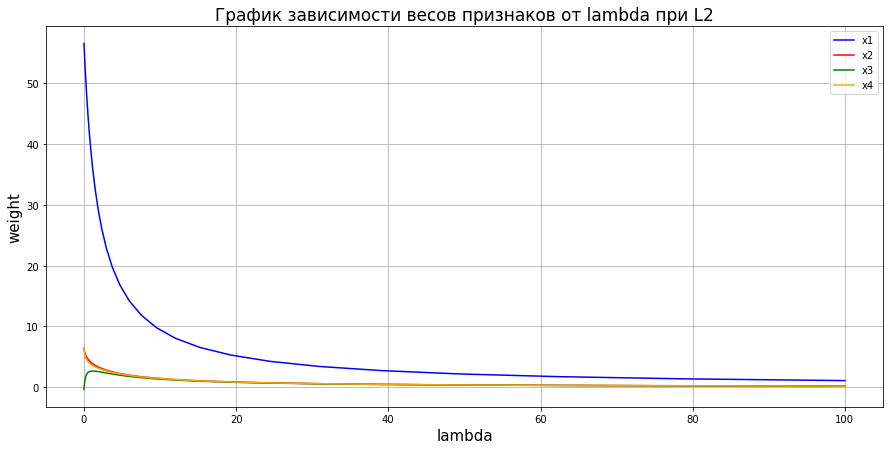

In [549]:
plt.figure(figsize=(15, 7))
plt.plot(lambdas, w_array[:,0], label='x1', color='blue')
plt.plot(lambdas, w_array[:,1], label='x2', color='red')
plt.plot(lambdas, w_array[:,2], label='x3', color='green')
plt.plot(lambdas, w_array[:,3], label='x4', color='orange')
plt.xlabel('lambda', fontsize = 15)
plt.ylabel('weight', fontsize = 15)
plt.title('График зависимости весов признаков от lambda при L2', fontsize = 17)
plt.legend()
plt.grid()
plt.show()

Вывод: изменение lambda приводит к плавному понижению весов с ростом lambda, веса не обнуляются

## 3. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [550]:
def gradient_descent_reg_l1(X, y, iterations=5000, eta=1e-2, lambda_=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        W -= eta * (2/n * np.dot(X.T, (y_pred - y)) + lambda_ * W / np.abs(W)) 
               
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [551]:
gradient_descent_reg_l1(X_st, y, iterations=2000, eta=1e-2, lambda_=1e-4)

Iter: 0, weights: [ 0.56758931 -0.23536574 -1.10441605  1.37824284], error 3431.175958609161
Iter: 200, weights: [55.51621463  5.2975028   1.72232873  5.40324361], error 26.710552939107203
Iter: 400, weights: [56.48264811  5.85628126  0.95544339  5.65545693], error 25.198146957788193
Iter: 600, weights: [56.4996457   6.0735818   0.49414401  5.92021034], error 25.02859788523444
Iter: 800, weights: [56.49994465  6.17109943  0.20233733  6.12574271], error 24.958853743655567
Iter: 1000, weights: [5.64999499e+01 6.22162490e+00 1.29167186e-02 6.27133313e+00], error 24.928519764602225
Iter: 1200, weights: [56.49995     6.25078148 -0.11138246  6.37071976], error 24.91518355003074
Iter: 1400, weights: [56.49995     6.26883536 -0.19356249  6.43756812], error 24.909294471617404
Iter: 1600, weights: [56.49995     6.28043505 -0.24804613  6.48223938], error 24.906690766989435
Iter: 1800, weights: [56.49995     6.28802211 -0.28421235  6.51199964], error 24.905538653308643
Final MSE: 24.90502829415339

array([56.49995   ,  6.29300663, -0.3081358 ,  6.53171823])

In [552]:
#посмотрим график изменения весов при L1 регуляризации в зависимости от lambda
lambdas = np.logspace(-3, 2, 50)
w_array_L1= gradient_descent_reg_l1(X_st, y, iterations=2000, eta=1e-2, lambda_=0)
for l in lambdas[1:]:
    w_array_L1 = np.vstack([w_array_L1, gradient_descent_reg_l1(X_st, y, iterations=2000, eta=1e-2, lambda_=l)])

Iter: 0, weights: [-0.29435797  2.11649657  2.10842742 -0.22443   ], error 3455.2781639472387
Iter: 200, weights: [55.50110386  5.45319032  3.13225178  3.81304762], error 28.05036827213247
Iter: 400, weights: [56.48243147  5.78735147  1.94646054  4.70762296], error 25.832316376834257
Iter: 600, weights: [56.49969101  5.97529802  1.16916229  5.32353384], error 25.31383839532677
Iter: 800, weights: [56.49999457  6.08981574  0.65590829  5.73935484], error 25.085287153335116
Iter: 1000, weights: [56.4999999   6.16275399  0.31584483  6.01766111], error 24.984391690848582
Iter: 1200, weights: [56.5         6.21025945  0.09017591  6.20320207], error 24.939842811440457
Iter: 1400, weights: [56.5         6.2415338  -0.05968834  6.32667837], error 24.920172189721477
Iter: 1600, weights: [56.5         6.26222633 -0.15924462  6.40878428], error 24.91148653059084
Iter: 1800, weights: [56.5         6.27594929 -0.2253909   6.46336053], error 24.90765132907268
Final MSE: 24.90595787374244
Iter: 0, wei

Iter: 600, weights: [56.49306864  6.14624856  0.35922329  5.98144036], error 24.99541780150963
Iter: 800, weights: [56.49336612  6.19956599  0.11816046  6.1771879 ], error 24.944827149248045
Iter: 1000, weights: [ 5.64933713e+01  6.23068973e+00 -3.03076383e-02  6.30438045e+00], error 24.923402823021583
Iter: 1200, weights: [56.49337144  6.24383954 -0.1124904   6.37611533], error 24.915043073447677
Iter: 1400, weights: [56.49337144  6.25405579 -0.16762772  6.42277329], error 24.910849046146506
Iter: 1600, weights: [56.49337144  6.26130837 -0.20441201  6.45348437], error 24.90866169103668
Iter: 1800, weights: [56.49337144  6.26626895 -0.22889942  6.47380257], error 24.907473240673802
Final MSE: 24.906800699605974
Iter: 0, weights: [2.76792215 0.00369676 0.01125246 1.2443962 ], error 3152.7029957733603
Iter: 200, weights: [55.54672638  5.19422784  2.17495815  5.02921075], error 26.99117796937481
Iter: 400, weights: [56.47499717  5.78802268  1.25514215  5.40444276], error 25.34895996105969

Iter: 1200, weights: [5.63888502e+01 6.16519265e+00 3.44578230e-03 6.22078645e+00], error 24.956373276865996
Iter: 1400, weights: [5.63888502e+01 6.14683124e+00 8.79786666e-04 6.25168388e+00], error 24.952402871164033
Iter: 1600, weights: [ 5.63888502e+01  6.13864210e+00 -8.62034796e-04  6.25979498e+00], error 24.95253525527321
Iter: 1800, weights: [ 5.63888502e+01  6.13595828e+00 -1.87899078e-04  6.26251830e+00], error 24.95244381333074
Final MSE: 24.952443593699524
Iter: 0, weights: [ 0.46078893  0.48809857 -1.1104005   1.28478781], error 3429.270880942925
Iter: 200, weights: [55.37626957  5.39192079  1.61482027  5.26251305], error 26.959018432728648
Iter: 400, weights: [56.34212012  5.8356659   0.89419392  5.57699951], error 25.242661967212126
Iter: 600, weights: [56.35910744  6.01713148  0.45088433  5.85749709], error 25.074786668031802
Iter: 800, weights: [56.35940622  6.10320005  0.16714831  6.06568375], error 25.004923083676402
Iter: 1000, weights: [5.63594115e+01 6.14682669e+00

Iter: 1000, weights: [5.46362031e+01 5.12509920e+00 5.15292493e-02 5.20893338e+00], error 32.357918531975415
Iter: 1200, weights: [5.46362031e+01 5.11308364e+00 3.12071796e-02 5.21891504e+00], error 32.440437023054145
Iter: 1400, weights: [5.46362031e+01 5.11112383e+00 1.19011305e-02 5.22462971e+00], error 32.49738747985899
Iter: 1600, weights: [54.63620314  5.11135127  0.06608369  5.22761507], error 32.28577251200833
Iter: 1800, weights: [5.46362031e+01 5.10819296e+00 3.96836874e-02 5.22486053e+00], error 32.40495959298328
Final MSE: 32.48193471635581
Iter: 0, weights: [ 1.67084566 -0.51526664 -0.17002914 -0.29852341], error 3327.9366120971526
Iter: 200, weights: [53.21969699  4.12200024  1.84142455  3.70520994], error 43.912154456357214
Iter: 400, weights: [54.12633543  4.58607883  0.92000515  4.20565255], error 37.78422404832848
Iter: 600, weights: [54.14228134  4.78924341  0.34070699  4.60455837], error 37.32636620195463
Iter: 800, weights: [5.41425618e+01 4.87403960e+00 3.45747631

Iter: 1200, weights: [25.24724037 -0.32672613  0.14690562 -0.26551801], error 1120.046856559318
Iter: 1400, weights: [25.24724037  0.09233469  0.27714623  0.15439824], error 1100.440403272882
Iter: 1600, weights: [25.24724037  0.55545528  0.4540766   0.62067109], error 1157.6465486448872
Iter: 1800, weights: [25.24724037 -0.31716846  0.53074026 -0.25628814], error 1138.1276807631916
Final MSE: 1117.4102003078358
Iter: 0, weights: [ 0.94934461 -0.50199469 -0.47384016 -0.15322256], error 3306.1159044097853
Iter: 200, weights: [16.68801731  0.98079415 -0.50624869 -0.21096406], error 1736.5114208393438
Iter: 400, weights: [16.96482825  0.92429545 -0.48832245 -0.21478216], error 1715.0469801585562
Iter: 600, weights: [16.96969678  0.85284954 -0.48862624 -0.23518773], error 1716.6982300644352
Iter: 800, weights: [16.96978241  0.78031987 -0.49157329 -0.25603381], error 1718.8437373241832
Iter: 1000, weights: [16.96978392  0.73149572 -0.48070161 -0.26695705], error 1719.9536003988765
Iter: 120

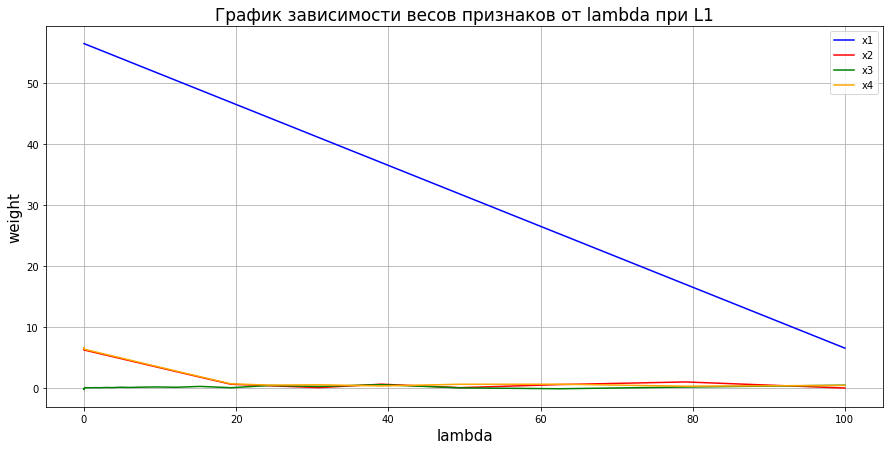

In [553]:
plt.figure(figsize=(15, 7))
plt.plot(lambdas, w_array_L1[:,0], label='x1', color='blue')
plt.plot(lambdas, w_array_L1[:,1], label='x2', color='red')
plt.plot(lambdas, w_array_L1[:,2], label='x3', color='green')
plt.plot(lambdas, w_array_L1[:,3], label='x4', color='orange')
plt.xlabel('lambda', fontsize = 15)
plt.ylabel('weight', fontsize = 15)
plt.title('График зависимости весов признаков от lambda при L1', fontsize = 17)
plt.legend()
plt.grid()
plt.show()

## 4. *Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [554]:
# сгенерируем набор данных
X, y, coef = datasets.make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
print(X, y, coef)

[[ 1.80409807e-01  5.53164274e-01]
 [-2.76179492e-01 -5.16883894e-01]
 [-4.62005348e-01  3.50888494e-01]
 [ 3.96520159e-01 -3.14617436e-01]
 [-1.02141473e+00  4.32395701e-01]
 [-3.13508197e-01  7.71011738e-01]
 [-1.45336435e+00 -3.38017777e-01]
 [-4.16757847e-01 -5.62668272e-02]
 [ 1.24823646e-01  7.56502143e-01]
 [ 1.00036589e+00 -3.81092518e-01]
 [-1.73795950e+00  1.04082395e+00]
 [-1.54667461e+00 -2.08265194e+00]
 [ 2.04207979e-01  1.40669624e+00]
 [-2.13619610e+00  1.64027081e+00]
 [ 4.33496330e-01  1.27837923e+00]
 [ 2.41439629e-01  4.97425649e-01]
 [-2.69056960e-01  2.23136679e+00]
 [-3.25049628e-01 -5.60234506e-01]
 [-9.02246068e-01 -5.90972275e-01]
 [-1.41881055e+00 -2.51774118e-01]
 [ 6.95119605e-01 -2.03346655e+00]
 [-1.09873895e+00  1.58448706e+00]
 [-6.53250268e-01  8.42456282e-01]
 [ 1.79259285e+00 -4.29013319e-01]
 [ 6.01515814e-01  3.65949071e-03]
 [-3.95702397e-02  3.26003433e-01]
 [-1.05795222e+00 -9.09007615e-01]
 [-3.75669423e-01 -7.44707629e-02]
 [ 1.03302907e+00 -3

In [555]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [556]:
W = np.random.randn(X.shape[1])
W

array([0.85490038, 0.9794109 ])

In [557]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        mse_gd.append(err)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [558]:
# Стохастический градиентноый спуск (SGD):
def stohastic_gradient_descent(X, y, iterations, size, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])             
    n = X.shape[0]                             
    for i in range(0, iterations):              
        inds = np.random.randint(n, size=size)  

        X_tmp = X[inds, ]                       
        y_tmp = np.array(y)[inds]               

        y_pred_tmp = np.dot(X_tmp, W)           
        error = calc_mse(y, np.dot(X, W))
        mse_sgd.append(error)
        
        W -= (eta * (2/len(y_tmp) * np.dot(X_tmp.T, (y_pred_tmp - y_tmp)))) 

        if i % (iterations / 10) == 0:                                      
            print(f'Итерация №: {i}, веса: {W}, MSE: {error}')
    
    print(f'Финальная MSE: {calc_mse(y, np.dot(X, W))}')                   
    return W

In [559]:
mse_gd = []
gradient_descent(X, y, iterations=150, eta=1e-2)

Iter: 0, weights: [1.43657135 0.17124246], error 2070.5703674840142
Iter: 15, weights: [13.00989515  4.2519021 ], error 1017.3279923403929
Iter: 30, weights: [20.92063897  7.4215366 ], error 509.6676532677593
Iter: 45, weights: [26.33450945  9.86476286], error 263.2073883081923
Iter: 60, weights: [30.04436507 11.73615545], error 142.66516788821514
Iter: 75, weights: [32.58997551 13.16194803], error 83.26414305767997
Iter: 90, weights: [34.33917566 14.24335496], error 53.77198823989822
Iter: 105, weights: [35.54289703 15.06039978], error 39.020902986762586
Iter: 120, weights: [36.37251238 15.67565761], error 31.589885971722833
Iter: 135, weights: [36.94519799 16.13762727], error 27.820751591248303
Final MSE: 25.89662334021373


array([37.31906291, 16.46355437])

In [562]:
mse_sgd_all = []
for i in [1,3,5,10]: #проанализируем использование стохастического градиентного спуска с разными объемами выборки объектов
    mse_sgd = []
    stohastic_gradient_descent(X, y, iterations=150, size=i, eta=1e-2)
    mse_sgd_all.append(mse_sgd)

Итерация №: 0, веса: [0.53772552 0.04029341], MSE: 2070.5703674840142
Итерация №: 15, веса: [13.5748095   0.16359587], MSE: 1163.8718859935523
Итерация №: 30, веса: [17.38675609  5.95060163], MSE: 683.2433660708602
Итерация №: 45, веса: [26.166162   10.40059234], MSE: 392.7892444011627
Итерация №: 60, веса: [28.23214889 11.13962394], MSE: 193.08664371957366
Итерация №: 75, веса: [31.5018813  11.81043239], MSE: 112.57119971580536
Итерация №: 90, веса: [32.75387651 13.15957838], MSE: 78.18748072655268
Итерация №: 105, веса: [34.19652446 14.29918739], MSE: 59.2662352733419
Итерация №: 120, веса: [35.09564679 14.11972612], MSE: 47.24796408277588
Итерация №: 135, веса: [36.84440742 15.21360469], MSE: 32.026160582462055
Финальная MSE: 28.294994297224044
Итерация №: 0, веса: [0.55488509 0.0186356 ], MSE: 2070.5703674840142
Итерация №: 15, веса: [12.386086    4.09921448], MSE: 1186.6627738337595
Итерация №: 30, веса: [18.72563151  5.76706332], MSE: 631.7301358498352
Итерация №: 45, веса: [24.8

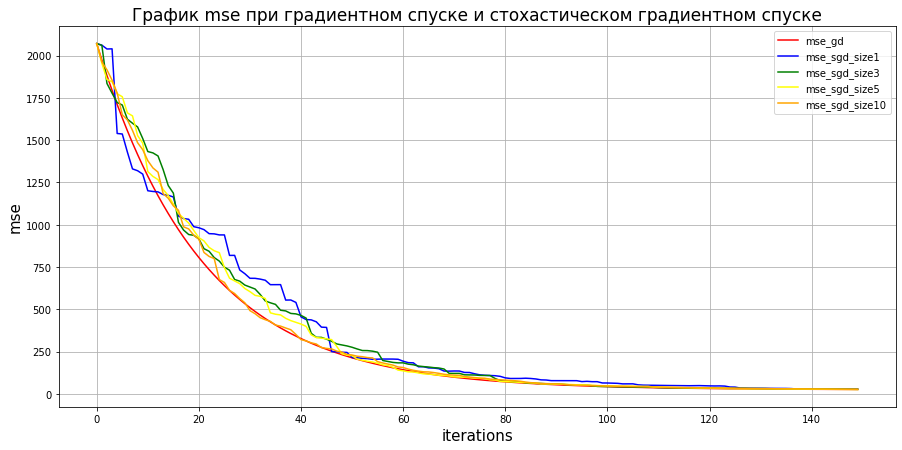

In [563]:
plt.figure(figsize=(15, 7))
plt.plot(mse_gd, label = 'mse_gd', color='red')
plt.plot(mse_sgd_all[0], label = 'mse_sgd_size1', color='blue')
plt.plot(mse_sgd_all[1], label = 'mse_sgd_size3', color='green')
plt.plot(mse_sgd_all[2], label = 'mse_sgd_size5', color='yellow')
plt.plot(mse_sgd_all[3], label = 'mse_sgd_size10', color='orange')


plt.xlabel('iterations', fontsize = 15)
plt.ylabel('mse', fontsize = 15)
plt.title('График mse при градиентном спуске и стохастическом градиентном спуске', fontsize = 17)
plt.legend()
plt.grid()
plt.show()

Вывод: в конечном итоге применение классического градиентного спуска и стохастического градиентного спуска (с вариантами размера выборки 1,3,5,10 объектов) приводят к одинаковому оптимальному результату. Градиентный спуск приводит модель к оптимальному результату немного быстрее, но, как видно из графика, уже к 140 итерации и стохастический градиентный спуск (даже с одним объектов в выборке) достигает оптимальной минимальной mse. Использование небольшой выборки (3-5 объектов) ускоряет процесс сходимости.